# Hasan Tanveer Mahmood
# Matric no: 1725413
# Bigdata Analysis Test: 1

#Necesarry Library need to import

In [78]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Read All dataset

In [79]:
linkedin = pd.read_csv('linkedin_to_isic_rev_4_industry_mapping_0.csv')
skill_pen= pd.read_excel('public_use-skill-penetration.xlsx' , 'Skill Penetration')
industry_skill = pd.read_excel('public_use-industry-skills-needs.xlsx' , 'Industry Skills Needs')
skill_migration = pd.read_excel('public_use-talent-migration.xlsx', 'Skill Migration')
growth_idust = pd.read_excel('public_use-industry-employment-growth.xlsx', 'Growth from Industry Transition')

In [80]:
#check dataset read successfull or not.
linkedin.head(5)

,isic_section,isic_section_name,isic_division,isic_division_name,industry_sk,industry_name,Industry_group_sk,Industry_group_name
0,A,A. Agriculture; forestry and fishing,1,"Crop and animal production, hunting and relate...",63,farming,1,Agriculture
1,A,A. Agriculture; forestry and fishing,1,"Crop and animal production, hunting and relate...",64,ranching,1,Agriculture
2,A,A. Agriculture; forestry and fishing,1,"Crop and animal production, hunting and relate...",65,dairy,1,Agriculture
3,A,A. Agriculture; forestry and fishing,3,Fishing and aquaculture,66,fishery,1,Agriculture
4,B,B. Mining and quarrying,5,Mining of coal and lignite,56,mining & metals,16,Energy and Mining


# Data cleaning

In [81]:
#check null values
linkedin.isnull().sum()

isic_section           0
isic_section_name      0
isic_division          0
isic_division_name     0
industry_sk            0
industry_name          0
Industry_group_sk      0
Industry_group_name    0
dtype: int64

<AxesSubplot:>

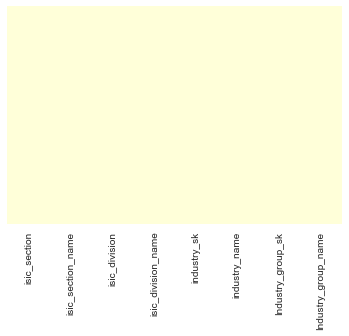

In [82]:
#visualize the null values
sns.heatmap(linkedin.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [83]:
linkedin.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
isic_division,148.0,59.351351,26.277655,-9.0,47.00,64.0,81.25,96.0
industry_sk,148.0,74.432432,42.992352,-9.0,37.75,74.5,111.25,148.0
Industry_group_sk,148.0,11.135135,6.205822,-9.0,6.00,11.0,15.00,24.0


In [84]:
#show the data type for linked in data.
linkedin.dtypes

isic_section           object
isic_section_name      object
isic_division           int64
isic_division_name     object
industry_sk             int64
industry_name          object
Industry_group_sk       int64
Industry_group_name    object
dtype: object

In [85]:
#replace all the semicolon to space
linkedin['isic_section_name'] = linkedin['isic_section_name'].str.replace(';', ' ')

In [86]:
linkedin.head(5)

,isic_section,isic_section_name,isic_division,isic_division_name,industry_sk,industry_name,Industry_group_sk,Industry_group_name
0,A,A. Agriculture forestry and fishing,1,"Crop and animal production, hunting and relate...",63,farming,1,Agriculture
1,A,A. Agriculture forestry and fishing,1,"Crop and animal production, hunting and relate...",64,ranching,1,Agriculture
2,A,A. Agriculture forestry and fishing,1,"Crop and animal production, hunting and relate...",65,dairy,1,Agriculture
3,A,A. Agriculture forestry and fishing,3,Fishing and aquaculture,66,fishery,1,Agriculture
4,B,B. Mining and quarrying,5,Mining of coal and lignite,56,mining & metals,16,Energy and Mining


# showing the corelation

<AxesSubplot:>

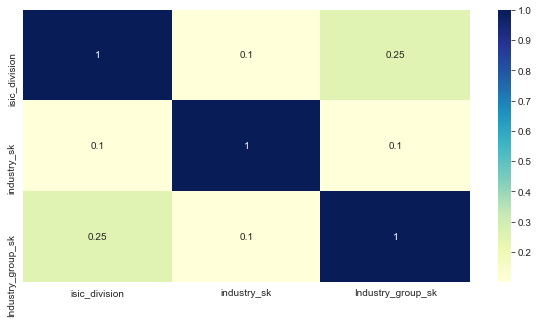

In [87]:
corr = linkedin.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot = True, cmap="YlGnBu")

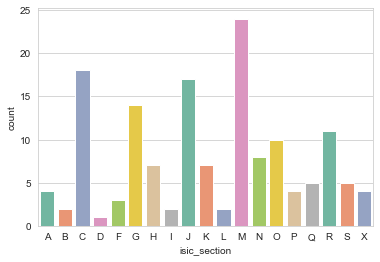

In [88]:
axis = sns.countplot(x="isic_section", data=linkedin, palette="Set2")

<AxesSubplot:>

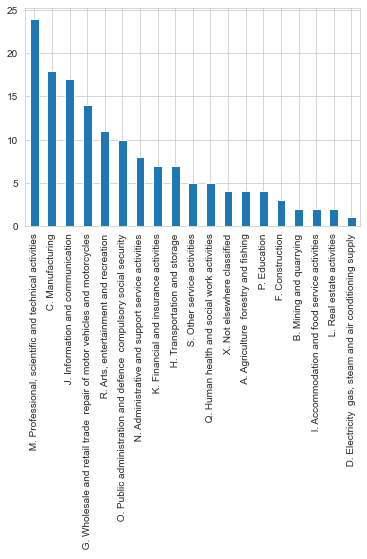

In [89]:
linkedin['isic_section_name'].value_counts().plot(kind='bar')

Box plot visualization

<AxesSubplot:xlabel='Industry_group_name', ylabel='industry_sk'>

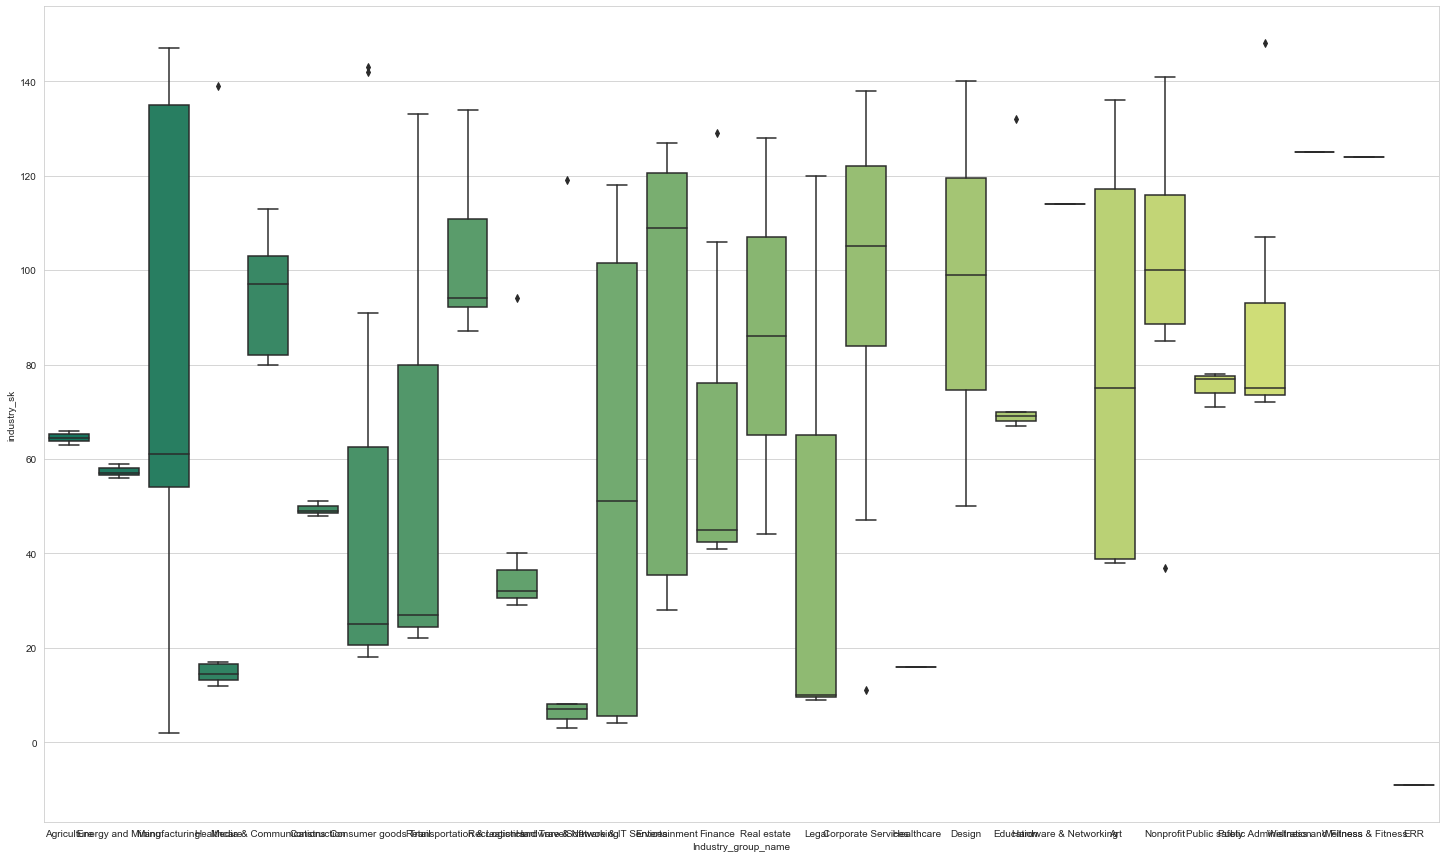

In [90]:
plt.figure(figsize=(25, 15))
sns.boxplot(x='Industry_group_name',y='industry_sk',data=linkedin,palette='summer')

<AxesSubplot:xlabel='industry_sk', ylabel='Density'>

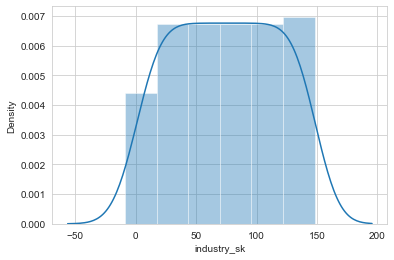

In [91]:
sns.distplot(linkedin["industry_sk"])

# Now, analysis Second Dataset Skill Penetration

Check data set read successfull

In [92]:
skill_pen.head()

,year,skill_group_category,skill_group_name,isic_section_index,isic_section_name,industry_name,skill_group_penetration_rate
0,2015,Business Skills,Accounts Payable,M,Professional scientific and technical activities,Accounting,0.00719
1,2015,Business Skills,Accounts Payable,M,Professional scientific and technical activities,Law Practice,0.00244
2,2015,Business Skills,Accounts Payable,M,Professional scientific and technical activities,Executive Office,0.00222
3,2015,Business Skills,Accounts Payable,C,Manufacturing,Packaging & Containers,0.00132
4,2015,Business Skills,Accounts Payable,B,Mining and quarrying,Oil & Energy,0.00132


Check Null values

In [93]:
skill_pen.isnull().sum()

year                            0
skill_group_category            0
skill_group_name                0
isic_section_index              0
isic_section_name               0
industry_name                   0
skill_group_penetration_rate    0
dtype: int64

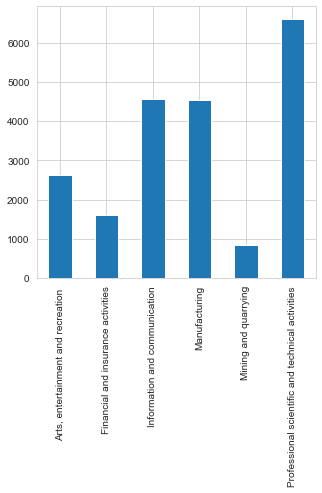

In [94]:
import matplotlib.pyplot as plt
skill_pen.isic_section_name.value_counts(dropna=False).sort_index().plot(kind='bar',figsize=(5,5))
plt.show()

Attributes visualization

<AxesSubplot:xlabel='skill_group_penetration_rate', ylabel='Density'>

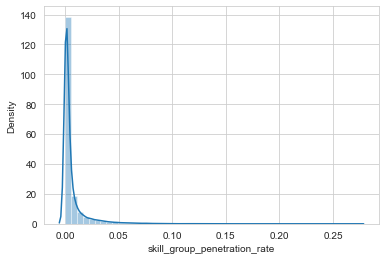

In [95]:
sns.distplot(skill_pen["skill_group_penetration_rate"])

<AxesSubplot:xlabel='industry_name', ylabel='count'>

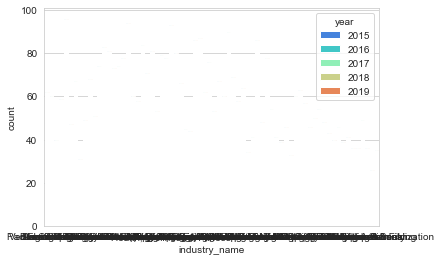

In [96]:
sns.set_style('whitegrid')
sns.countplot(x='industry_name',hue='year',data=skill_pen,palette='rainbow')

# Now Analysis the third data set

Check data set

In [97]:
industry_skill.head(5)

,year,isic_section_index,isic_section_name,industry_name,skill_group_category,skill_group_name,skill_group_rank
0,2015,B,Mining and quarrying,Mining & Metals,Specialized Industry Skills,Mining,1
1,2015,B,Mining and quarrying,Mining & Metals,Soft Skills,Negotiation,2
2,2015,B,Mining and quarrying,Mining & Metals,Business Skills,Project Management,3
3,2015,B,Mining and quarrying,Mining & Metals,Business Skills,Business Management,4
4,2015,B,Mining and quarrying,Mining & Metals,Specialized Industry Skills,Earth Science,5


Find the unique industry name

In [98]:
industry_skill['industry_name'].unique()

array(['Mining & Metals', 'Oil & Energy', 'Pharmaceuticals',
       'Food Production', 'Aviation & Aerospace', 'Automotive',
       'Chemicals', 'Machinery', 'Textiles', 'Paper & Forest Products',
       'Printing', 'Electrical & Electronic Manufacturing', 'Plastics',
       'Renewables & Environment', 'Packaging & Containers',
       'Industrial Automation', 'Computer Hardware', 'Computer Software',
       'Computer Networking', 'Internet', 'Semiconductors',
       'Telecommunications', 'Motion Pictures & Film', 'Broadcast Media',
       'Newspapers', 'Publishing', 'Information Technology & Services',
       'Writing & Editing', 'Computer Games', 'Online Media',
       'Computer & Network Security', 'Media Production', 'Banking',
       'Insurance', 'Financial Services', 'Investment Banking',
       'Investment Management', 'Venture Capital & Private Equity',
       'Law Practice', 'Legal Services', 'Management Consulting',
       'Biotechnology', 'Veterinary', 'Accounting',
       'A

In [99]:
industry_skill.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,3500.0,2017.0,1.414416,2015.0,2016.0,2017.0,2018.0,2019.0
skill_group_rank,3500.0,5.5,2.872692,1.0,3.0,5.5,8.0,10.0


The connection Between Section And year

<AxesSubplot:xlabel='year', ylabel='count'>

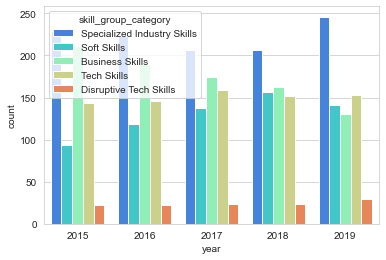

In [100]:
sns.set_style('whitegrid')
sns.countplot(x='year',hue='skill_group_category',data=industry_skill,palette='rainbow')

# Fourth dataset Talent Migration data set

In [101]:
skill_migration.head(5)

,country_code,country_name,wb_income,wb_region,skill_group_id,skill_group_category,skill_group_name,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
0,af,Afghanistan,Low income,South Asia,2549,Tech Skills,Information Management,-791.59,-705.88,-550.04,-680.92,-1208.79
1,af,Afghanistan,Low income,South Asia,2608,Business Skills,Operational Efficiency,-1610.25,-933.55,-776.06,-532.22,-790.09
2,af,Afghanistan,Low income,South Asia,3806,Specialized Industry Skills,National Security,-1731.45,-769.68,-756.59,-600.44,-767.64
3,af,Afghanistan,Low income,South Asia,50321,Tech Skills,Software Testing,-957.50,-828.54,-964.73,-406.50,-739.51
4,af,Afghanistan,Low income,South Asia,1606,Specialized Industry Skills,Navy,-1510.71,-841.17,-842.32,-581.71,-718.64


In [102]:
skill_migration.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
skill_group_id,17617.0,6768.889368,11609.744113,44.00,618.00,2091.00,6189.00,50415.00
net_per_10K_2015,17617.0,-14.600256,255.690007,-3037.38,-106.16,-11.50,72.12,2824.97
net_per_10K_2016,17617.0,-39.200810,252.333770,-2435.26,-119.24,-27.04,58.85,1796.89
net_per_10K_2017,17617.0,-54.772238,256.931197,-6604.67,-121.46,-31.81,47.48,1906.14
net_per_10K_2018,17617.0,-36.081342,265.209723,-3629.02,-111.44,-15.17,65.94,1515.79
net_per_10K_2019,17617.0,-34.782431,239.798934,-4022.04,-111.74,-17.43,65.92,1901.99


<AxesSubplot:ylabel='Information Management'>

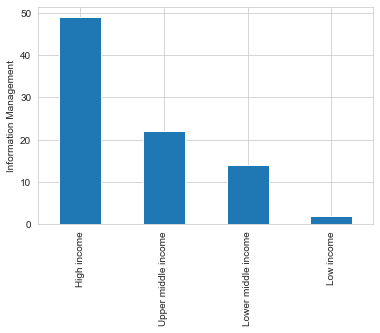

In [103]:
skill_migration[skill_migration['skill_group_name']=='Information Management']['wb_income'].value_counts().plot(kind='bar',ylabel='Information Management')

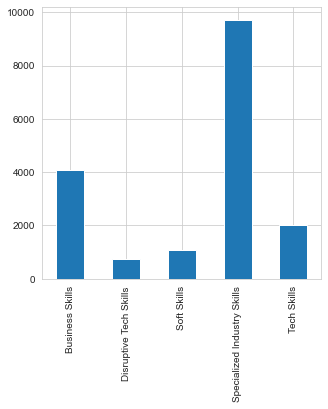

In [104]:
import matplotlib.pyplot as plt
skill_migration.skill_group_category.value_counts(dropna=False).sort_index().plot(kind='bar',figsize=(5,5))
plt.show()

<AxesSubplot:ylabel='low income'>

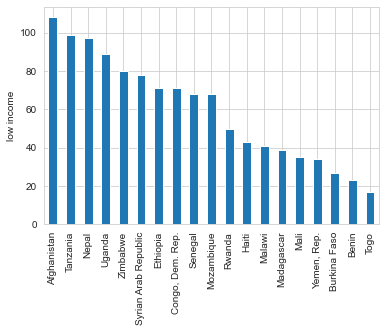

In [105]:
skill_migration[skill_migration['wb_income']=='Low income']['country_name'].value_counts().plot(kind='bar',ylabel='low income')

# Now fifth dataset Growth from Industry Transition

In [106]:
growth_idust.head(5)

,country_code,country_name,wb_region,wb_income,isic_section_index,isic_section_name,industry_id,industry_name,growth_rate_2015,growth_rate_2016,growth_rate_2017,growth_rate_2018,growth_rate_2019
0,ae,United Arab Emirates,Middle East & North Africa,High income,B,Mining and quarrying,56,Mining & Metals,0.078000,0.058550,0.043402,0.010048,-0.000621
1,ae,United Arab Emirates,Middle East & North Africa,High income,B,Mining and quarrying,57,Oil & Energy,0.033015,0.013479,0.017459,0.018514,0.022606
2,ae,United Arab Emirates,Middle East & North Africa,High income,C,Manufacturing,15,Pharmaceuticals,0.171367,0.136986,0.090631,0.048148,0.028423
3,ae,United Arab Emirates,Middle East & North Africa,High income,C,Manufacturing,23,Food Production,0.063351,0.038647,0.022137,0.005990,0.004317
4,ae,United Arab Emirates,Middle East & North Africa,High income,C,Manufacturing,52,Aviation & Aerospace,0.096607,0.056744,0.028673,0.015048,0.000816


In [107]:
growth_idust.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
industry_id,7335.0,70.444853,43.195772,3.000000,37.000000,61.000000,110.000000,147.000000
growth_rate_2015,7335.0,0.000465,0.057863,-0.372654,-0.026549,-0.001190,0.023056,1.084507
growth_rate_2016,7335.0,0.001303,0.051965,-0.310484,-0.023920,-0.001036,0.021858,0.760417
growth_rate_2017,7335.0,0.000662,0.044719,-0.603328,-0.020628,0.000000,0.018868,0.459854
growth_rate_2018,7335.0,0.000499,0.036628,-0.186667,-0.017104,0.000000,0.015649,0.317073
growth_rate_2019,7335.0,0.000330,0.027025,-0.164179,-0.012658,-0.000468,0.011299,0.345154


In [108]:
growth_idust['wb_income'].unique()

array(['High income', 'Low income', 'Upper middle income',
       'Lower middle income'], dtype=object)

In [109]:
growth_idust.isnull().sum()

country_code          0
country_name          0
wb_region             0
wb_income             0
isic_section_index    0
isic_section_name     0
industry_id           0
industry_name         0
growth_rate_2015      0
growth_rate_2016      0
growth_rate_2017      0
growth_rate_2018      0
growth_rate_2019      0
dtype: int64

Find the unique region

In [110]:
growth_idust['wb_region'].unique()

array(['Middle East & North Africa', 'South Asia',
       'Europe & Central Asia', 'Sub-Saharan Africa ',
       'Latin America & Caribbean ', 'East Asia & Pacific',
       'North America'], dtype=object)

Finding the corelation

<AxesSubplot:>

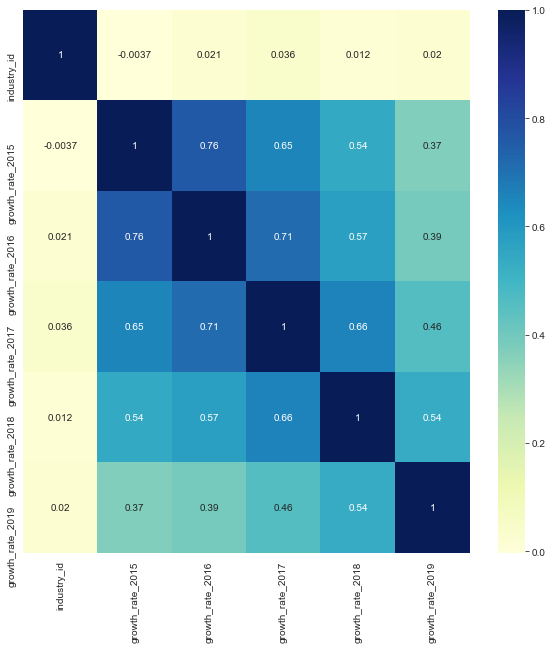

In [111]:
corr = growth_idust.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot = True, cmap="YlGnBu")

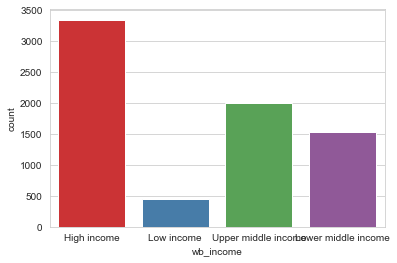

In [112]:
axis = sns.countplot(x="wb_income", data=growth_idust, palette="Set1")

<AxesSubplot:ylabel='low income'>

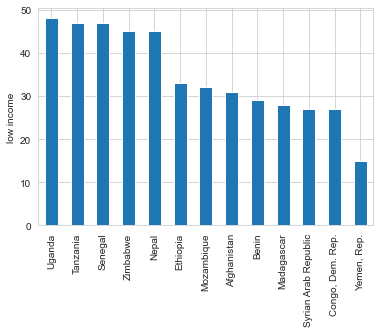

In [113]:
growth_idust[growth_idust['wb_income']=='Low income']['country_name'].value_counts().plot(kind='bar',ylabel='low income')

# finish